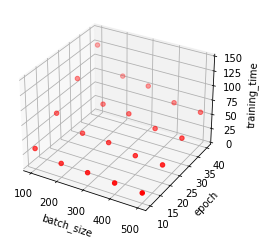

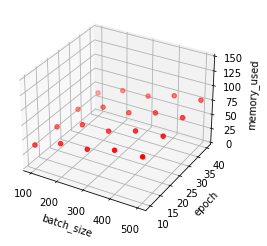

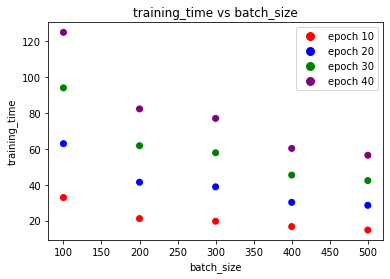

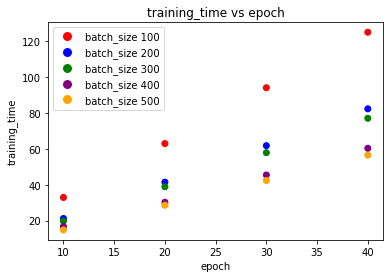

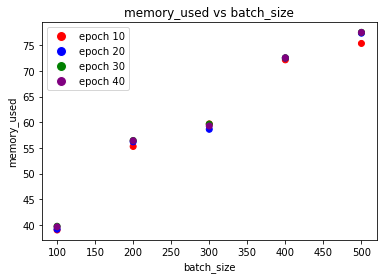

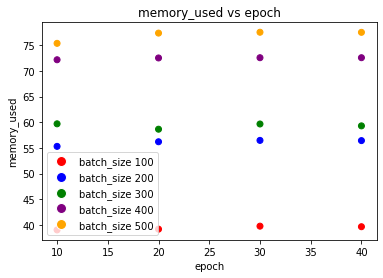

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def plot_as_2d(filename, x_label, y_label, depending_on):
    # load the csv file into a pandas dataframe
    df = pd.read_csv(filename)
    
    # create a color map based on the value of the epoch number
    if depending_on == 'batch_size':
        colors = df[depending_on].map({100: 'red', 200: 'blue', 300: 'green', 400: 'purple', 500: 'orange'})
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 100', markerfacecolor='red', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 200', markerfacecolor='blue', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 300', markerfacecolor='green', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 400', markerfacecolor='purple', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 500', markerfacecolor='orange', markersize=10),
        ]
    elif depending_on == 'epoch':
        colors = df[depending_on].map({10: 'red', 20: 'blue', 30: 'green', 40: 'purple'})
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 10', markerfacecolor='red', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 20', markerfacecolor='blue', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 30', markerfacecolor='green', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label=f'{depending_on} 40', markerfacecolor='purple', markersize=10),
        ]
    

    # plot the graph
    plt.scatter(df[x_label], df[y_label], c=colors)

    # add labels and title to the graph
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{y_label} vs {x_label}')
    plt.legend(handles=legend_elements)

    # show the plot
    plt.show()
    
    
def plot_as_3d(filename, x_label, y_label, z_label):
    df = pd.read_csv(filename)

    # Split the DataFrame into features (X) and target (y)
    X = df[[x_label, y_label]]
    y = df[z_label]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df[x_label], df[y_label], df[z_label], c='r', marker='o')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if z_label == 'training_time':
        ax.set_zlim(0, 150)
    elif z_label == 'memory_used':
        ax.set_zlim(0, 100)
    ax.set_zlabel(z_label)

    plt.show()


def train(filename):
    # Load the CSV file as a pandas DataFrame
    df = pd.read_csv(filename)
    
    # Split the DataFrame into features (X) and target (y)
    X = df[['batch_size', 'epoch']]
    y = df['training_time']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model on the test data
    training_set_score = model.score(X_train, y_train)
    test_set_score = model.score(X_test, y_test)
    print("Training set score:", training_set_score)
    print("Test set score:", test_set_score)


plot_as_3d('data.csv', 'batch_size', 'epoch', 'training_time')
plot_as_3d('data.csv', 'batch_size', 'epoch', 'memory_used')
plot_as_2d('data.csv', 'batch_size', 'training_time', 'epoch')
plot_as_2d('data.csv', 'epoch', 'training_time', 'batch_size')
plot_as_2d('data.csv', 'batch_size', 'memory_used', 'epoch')
plot_as_2d('data.csv', 'epoch', 'memory_used', 'batch_size')
# Training('data.csv')